
# HDip Data Analytics numpy.random project

The **numpy.random** function, part of the numpy software package, generates **pseudo** random numbers. An initial value, the **seed**, determines the output produced by the algorithm. For any given seed the  same 'random' output will be produced, hence the term 'pseudo'. Without knowing the seed it will be difficult for an observer to predict the output. A truly random generator would always produce an unpredictable outcome - this could be, for example, by measuring the value of a physical entity, such as the level of background radiation. There are many applications however where a pseudo random output is adequate, or indeed desirable. One instance is the encryption and decryption of data, required for many purposes. In order to decrypt data, the application receiving the encrypted data simply needs the same seed(s) value(s) that was used to generate the encryption key.   

The list of commands, and syntax for them, are taken from the numpy.random documentation at :  
https://docs.scipy.org/doc/numpy-1.16.0/reference/routines.random.html

Work through the cells in this notebook sequentially to demonstrate features of **numpy.random**, starting with the simple options (the use of 'seed' is shown later in the notebook).


## Part 1 - Simple random data functions

The first option we'll examine is **rand**. This uses a uniform distribution to select numbers from the range `[0,1)`, that is, inclusive of 0 but exclusive of 1. This distribution is displayed in systems where the likelihood of each possible outcome is approximately equal, for example when spinning a roulette wheel. Other than for the 'bytes' option, described below, all of the following simple functions produce outputs that are (potentially) multi-dimensional arrays. For 'rand' the syntax is :  
**rand(s1, s2, .. ,sn)** , where 'sx' is the number of elements in that dimension of the array.  
(ref https://docs.scipy.org/doc/numpy-1.16.0/reference/routines.random.html)  
For example, rand(5) produces a one dimensional array containing 5 entries. rand(2,4) would give a 2D array (a matrix) of size 2x4, eg:

In [33]:
# Import the numpy package
import numpy as np
print(np.random.rand(5))
print(np.random.rand(2,4))

[0.18443987 0.78533515 0.85397529 0.49423684 0.84656149]
[[0.07964548 0.50524609 0.0652865  0.42812233]
 [0.09653092 0.12715997 0.59674531 0.226012  ]]


When describing the remainder of the simple functions one dimensional arrays will be used, as having multi-dimensional arrays confuses the outputs somewhat, where the interests of the descriptions lie principally in the types of data in individual elements, and their distributions (which are unaffected by the number of dimensions).

To illustrate the distribution of numbers generated by 'rand' we'll use a histogram plot of 1000 values :

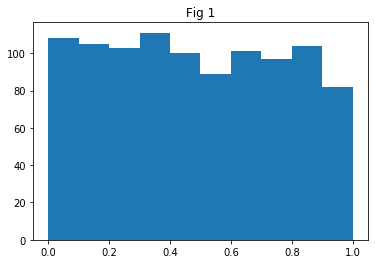

In [44]:
import matplotlib.pyplot as plt
x=np.random.rand(1000)
plt.hist(x)
plt.title("Fig 1")
plt.show()

Next, consider the **randn** function. Syntax : random.randn(s1, s2, .. ,sn)  - as for **rand** above.  
This outputs an array of numbers from the Normal distribution, with mean 0 and variance 1. This type of distribution might be expected in many situations where data are more likely to be clumped around a central mean value, such as the height of all adult males or females in a country.  
An example of using this function might be to test how closely the values of the measurement of a particular aspect of a population match that of a random Normal Distribution (so that appropriate statistical analysis can then be carried out).  
The output from 'randn' is best illustrated using a plot - see Fig 2 below for an output of 1000 values generated by the function:

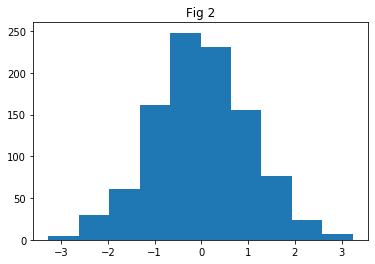

In [43]:
x=np.random.randn(1000)
plt.hist(x)
plt.title("Fig 2")
plt.show()

For small population samples an obvious distribution pattern may be much less evident - take the randn function with just 15 values :

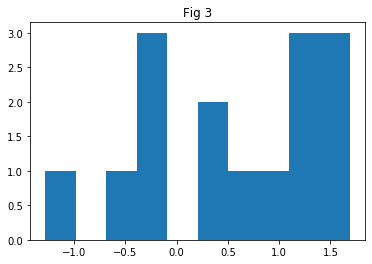

In [8]:
x=np.random.randn(15)
plt.hist(x)
plt.title("Fig 3")
plt.show()

The **randint** function produces a random integer output, based on a discrete (a finite number of values to choose from), uniform distribution.  
Syntax : random.randint(low `[,high] [,size] [,dtype]`)  
The output is a random sample of integers in the range `[low,high)`, or if 'high' is not specified in the range `[0,low)`. 'size' is the number of elements in the output array, eg size=5 or size=(2,4,6), and 'dtype' is the type of integers returned (in terms of the number of bits they contain), with possible values int8, int16, int32 and int64 (the default).  
A selection generated by randint might be useful, for example, in choosing people for jury service - assign every eligible person in the population an integer, then select 12 of them at random, eg:

In [36]:
x=np.random.randint(0,high=3000000,size=12)
print(x)

[ 439072 2497674  961320  686114  824636  296585 1923830 2650950 1498198
 1128902 2842643  273464]


An example of the impact on the output of using randint can be seen by running the following command :

In [38]:
x=np.random.randint(-10,high=128,size=12,dtype='int8')
print(x)

[ 76  71  30 121  51  -9  94  75  46  -4 115  50]


The values that can be held by an 'int8' integer only range from -128 to 127, consequently all elements in the output will be in this range. If a 'low' or a 'high' value outside this range is specified, an error is generated.

The function **random.random_integers** is the same as 'randint', apart from not having a 'dtype' option, and the 'high' value being inclusive rather than exclusive. eg:

In [17]:
x=np.random.randint(1,high=3,size=10)
print(x)
x=np.random.random_integers(1,high=3,size=10)
print(x)

[2 2 1 1 1 2 1 2 2 2]
[1 2 3 1 3 2 2 2 2 3]


C:\Users\dingl\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: This function is deprecated. Please call randint(1, 3 + 1) instead
  This is separate from the ipykernel package so we can avoid doing imports until


Four functions, **random_sample**, **random**, **ranf** and **sample** are all aliases, providing a selection of floating point number outputs in the range `[0,1)`, with a parameter defining the number of elements to return. They are basically the same as **rand**, with just a slightly different syntax for expressing the array size.  
Syntax eg: random.random(size)  where 'size' is the array size, eg 5  or (2,1,9,10)  
(ref https://stackoverflow.com/questions/18829185/difference-between-various-numpy-random-functions)  
(ref https://stackoverflow.com/questions/47231852/np-random-rand-vs-np-random-random)

eg: 

In [39]:
x=np.random.random(10)
print(x)
x=np.random.sample(5)
print(x)

[0.24717724 0.06714437 0.99385201 0.97058031 0.80025835 0.60181712
 0.76495986 0.16922545 0.29302323 0.52406688]
[0.35662428 0.04567897 0.98315345 0.44135492 0.50400044]


**random.bytes** returns a random list of ASCII (American Standard Code for Information Interchange) byte values, preceeded by 'b' and enclosed in single quotes. Printable characters are displayed in their usual form, with unprintable ones being depicted using '\x' followed by a two character hex value as defined by the ASCII table of characters (shown in http://www.asciitable.com) For example: '\x1B' is 'Escape'. This provides for a random selection from 255 characters, rather than the 10 numeric characters for other options, and might perhaps be useful in generating keys for encrypting data.   
Syntax : random.bytes(number-of-bytes)  (output is a one dimensional array)  
An example creating 3 random bytes is:

In [33]:
x=np.random.bytes(3)
print(x)

b'-o\x9d'


The final simple random function is **choice**. This generates a random sample from an input array, with the option of specifying a probability for each element of the array to be selected, and also whether or not each element in the array can be selected more than once (the option 'replace').   
Such a function might be used, for example, to select random questions from a bank of questions to ask in an exam.  
The syntax for this option is :   
random.choice(array `[,size]` `[,replace={True/False}]` `[,p=[p1,p1,..,pn]]`  
'array' can be specified simply as an integer, in which case it is treated as a range of integers, from 0 to the (specified value - 1).
For example.

In [24]:
x=np.random.choice(5,10)
print(x)

[3 0 2 1 4 0 1 1 1 2]


This selects 10 random samples from the range `[0,5)`  
If we tried to use 'replace=False' an error would occur, as the 'size' parameter is greater than the number of elements in the array : 

In [22]:
x=np.random.choice(3,10,replace=False)
print(x)

ValueError: Cannot take a larger sample than population when 'replace=False'

If 'size' is now set to the number of elements in the array, each one will be returned once :

In [26]:
x=np.random.choice(5,5,replace=False)
print(x)

[3 0 2 1 4]


An example of using 'choice' on an input array of strings is:

In [28]:
instring=['apple','pear','banana','grape','orange','lemon','lime','strawberry']
x=np.random.choice(instring,6,replace=True)
print(x)

['grape' 'lemon' 'grape' 'lemon' 'apple' 'apple']


With 'replace=True' each element in the array can be selected more than once.  
Finally, include the probability of selecting each element - the number of elements in the array of probabilities should match the number of elements in the array being selected from; the position of each element in the array being selected from is matched with the probability in the same position in the array of probabilities, eg

In [30]:
instring=['apple','pear','banana','grape','orange','lemon','lime','strawberry']
x=np.random.choice(instring,12,replace=True,p=[0.05,0.5,0.1,0.2,0.05,0.1,0,0])
print(x)

['lemon' 'apple' 'grape' 'pear' 'pear' 'pear' 'orange' 'pear' 'pear'
 'grape' 'lemon' 'grape']


Lime and strawberry will never be selected, as they have a probability of 0 assigned them. Overall pear should be most often chosen, with a probability of 0.5, and grape should be next most common.

## Part 2 Permutation functions

There are two permutation functions, 'shuffle' and 'permutation'.  
First, **shuffle** :

This function shuffles the elements of an array - it does not add or remove anything from the array.
For a multi-dimensional array the order of sub-arrays is shuffled, but not the contents - eg, for a matrix the row order would change but not the values in each row.  
Syntax : random.shuffle(array)   where 'array' is the target array.  
eg:

In [56]:
x=[1,2,3,4,5]
np.random.shuffle(x)
print(x)

[3, 2, 4, 5, 1]


Now shuffle the contents of a matrix - 
(ref https://stackoverflow.com/questions/6667201/how-to-define-a-two-dimensional-array-in-python)

In [75]:
x=np.matrix([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
np.random.shuffle(x)
print(x)

[[4 5 6]
 [1 2 3]
 [7 8 9]]


(ref https://stackoverflow.com/questions/1514553/how-to-declare-an-array-in-python)

In [ ]:
from array import array
intarray = array('i')

In [60]:
array = [[ ['1' for col in range(3)] for col in range(3)] for row in range(3)]
print(array)


[[['1', '1', '1'], ['1', '1', '1'], ['1', '1', '1']], [['1', '1', '1'], ['1', '1', '1'], ['1', '1', '1']], [['1', '1', '1'], ['1', '1', '1'], ['1', '1', '1']]]


In [74]:
x=np.ndarray(shape=(2,3,4), dtype=int, order='F')
x[0,0,0]=1
x[0,1,1]=2
x[0,2,2]=3
print(x)
print("-------------------")
np.random.shuffle(x)
print(x)

[[[1 0 0 0]
  [0 2 0 0]
  [0 0 3 0]]

 [[1 2 3 0]
  [0 2 0 0]
  [0 0 3 0]]]
-------------------
[[[1 0 0 0]
  [0 2 0 0]
  [0 0 3 0]]

 [[1 2 3 0]
  [0 2 0 0]
  [0 0 3 0]]]


The **permutation** function.  
Syntax : random.permutation(x) where 'x' is an int or an array
If 'x' is an int then a permutation is returned of a range of integers from 0 to (x-1), eg:

In [78]:
print(np.random.permutation(5))

[2 4 3 1 0]


Note how a shuffled list of the numbers from 0 to 4 (= 5-1) is returned.
For an array, a new array is returned that is a shuffled copy of the original, eg:

In [79]:
x=[1,2,3,4,5]
y=np.random.permutation(x)
print(x)
print(y)

[1, 2, 3, 4, 5]
[5 2 4 1 3]


Note how the original array 'x' is left unchanged, unlike for **shuffle**

## Part 3 Selection of Distribution functions

In [ ]:
x=np.random.normal(loc=0.0, scale=1.0, size=1000)
plt.hist(x)
plt.title("Fig 3")
plt.show()

## Part 4 The use of seeds

The random number generator used by numpy.random is called the Mersenne Twister. It is beyond the scope of this document to describe the algorithm used by this generator, but it is given in Wikipedia - https://en.wikipedia.org/wiki/Mersenne_Twister  
The first function in the algorithm initialises the generator from a seed. As mentioned earlier, this then determines the subsequent outputs.  
If 624 consecutive outputs are obtained, it is possible to then predict future outputs  
(ref https://jazzy.id.au/2010/09/22/cracking_random_number_generators_part_3.html)

To demonstrate use of the seed, generate a single number twice, first without specifying the seed, and then using the same seed :

In [31]:
# Generate 2 numbers without using 'seed'
print(np.random.rand())
print(np.random.rand())
# Now set the seed to a specific value, and generate two more numbers
np.random.seed(2)
print(np.random.rand())
np.random.seed(2)
print(np.random.rand())

0.4117464389724873
0.63084266314589
0.43599490214200376
0.43599490214200376


As can be seen, the 3rd and 4th values are the same, whereas the first 2, with different seeds, differ (probably - if seed selection is random there is a very small probability the same seed could be selected twice in succession. You would need to know details of the seed selection criteria to determine this probability, and it is possible the selection deliberately prevents using the same seed twice, although that would reduce the overall level of randomness of the process).